In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_analysis.csv')

In [ ]:
!pip install -q wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [ ]:
nlp_terms = set([
    "tokenization", "embedding", "transformer", "huggingface", "spacy", "nltk", "bert",
    "model", "fine-tuning", "pretrained", "classification", "text", "sentence", "corpus",
    "lemmatization", "stemming", "pos", "ner", "word2vec", "glove", "attention",
    "sequence", "context", "language", "preprocessing"
])


In [ ]:
import re

def filter_nlp_terms(text, vocab):
    # Lowercase and remove non-alphanumeric characters except hyphen
    text = re.sub(r"[^a-zA-Z0-9\- ]+", " ", text.lower())
    return ' '.join([word for word in text.split() if word in vocab])


In [ ]:
!pip install -q spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.isalpha()])


In [ ]:
df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)


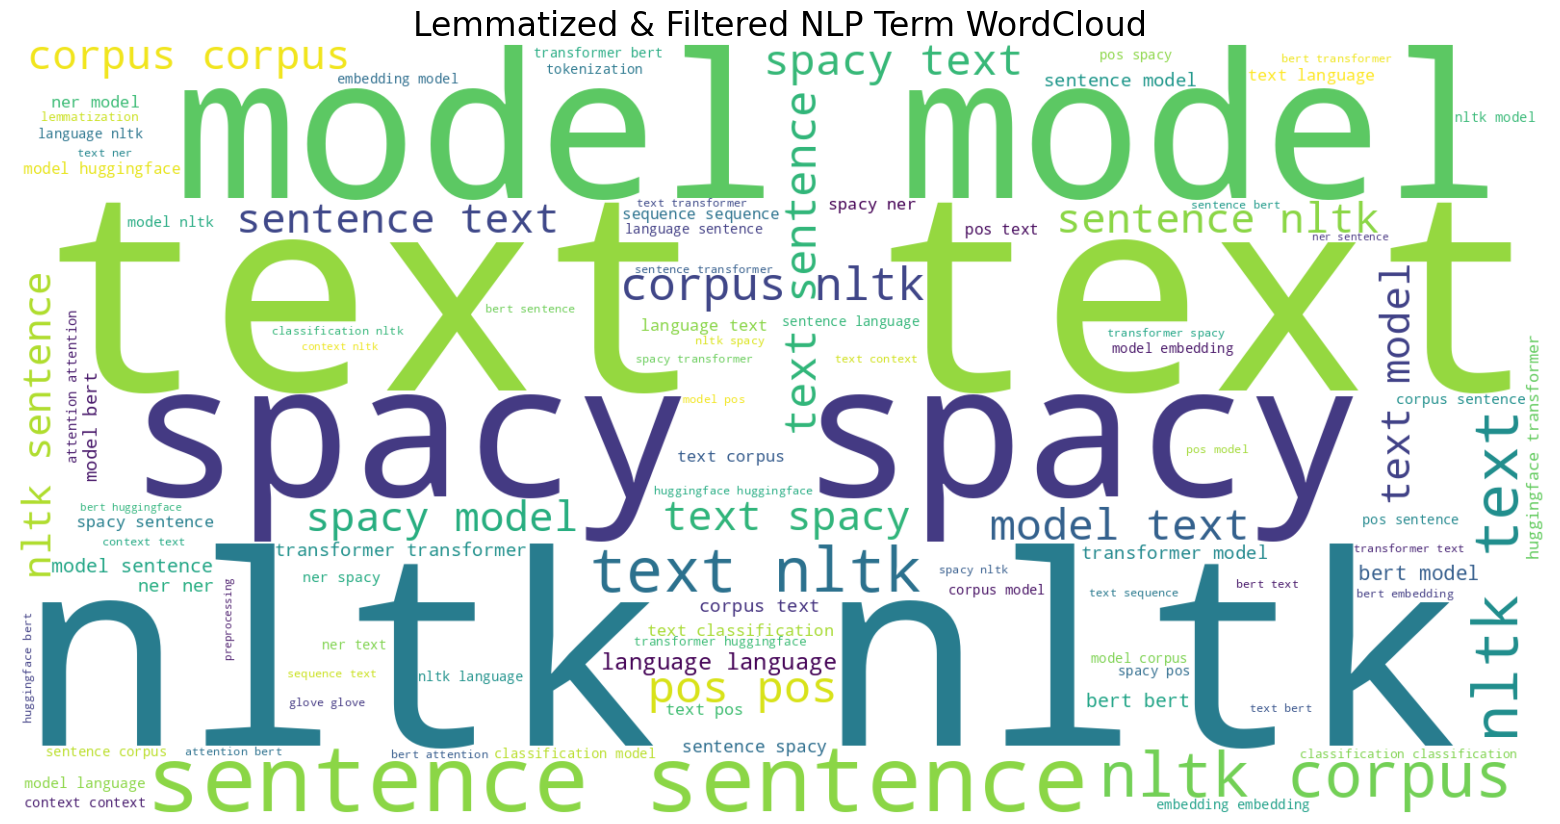

In [ ]:
filtered_corpus = ' '.join(df['lemmatized_text'].apply(lambda x: filter_nlp_terms(x, nlp_terms)))

wordcloud = WordCloud(
    width=1600, height=800,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(filtered_corpus)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Lemmatized & Filtered NLP Term WordCloud", fontsize=24)
plt.show()
